In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot

In [2]:
data = pd.read_csv(
"/content/archive.zip")

In [3]:
data.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,lat,lng
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate,44.7444,44.2031
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,-5.2900,-44.4900
2,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,-11.2958,-41.9869
3,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate,37.1667,15.1833
4,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good,53.0167,20.8833


 1) What are the data types? (Only numeric and categorical)

 Answer- categorcial data- country, city, AQI category, CO AQI category,Ozone AQI Category,
  NO2 AQI Category, PM2.5 AQI Category
  
  numerical data- AQI Value, CO AQI value, Ozone AQI value, NO2 AQI value, PM2.5 AQI Value

In [4]:
data.isnull().sum()


Country               302
City                    0
AQI Value               0
AQI Category            0
CO AQI Value            0
CO AQI Category         0
Ozone AQI Value         0
Ozone AQI Category      0
NO2 AQI Value           0
NO2 AQI Category        0
PM2.5 AQI Value         0
PM2.5 AQI Category      0
lat                     0
lng                     0
dtype: int64

Are there missing values?

Answer- yes i have dropped them and it did not affect the rows and columns

In [6]:
data.describe()

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,lat,lng
count,16695.000000,16695.000000,16695.000000,16695.000000,16695.000000,16695.000000,16695.000000
mean,62.998682,1.342138,31.767355,3.819647,59.821324,30.267148,-3.944485
std,43.091971,2.371379,22.839343,5.880677,43.208298,22.947398,73.037148
min,7.000000,0.000000,0.000000,0.000000,0.000000,-54.801900,-171.750000
25%,38.500000,1.000000,20.000000,0.000000,34.000000,16.515450,-75.180000
50%,52.000000,1.000000,29.000000,2.000000,52.000000,38.815800,5.643100
75%,69.000000,1.000000,38.000000,5.000000,69.000000,46.683300,36.275000
max,500.000000,133.000000,222.000000,91.000000,500.000000,70.767000,178.017800


In [7]:
rows, columns = data.shape

print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 16695
Number of columns: 14


In [8]:
data = data.dropna()

In [10]:
data.describe()

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,lat,lng
count,16393.000000,16393.000000,16393.000000,16393.000000,16393.000000,16393.000000,16393.000000
mean,63.227902,1.349356,31.794424,3.851156,60.075520,30.330645,-4.223929
std,43.297779,2.390045,22.975905,5.911545,43.378779,22.922043,72.909196
min,7.000000,0.000000,0.000000,0.000000,0.000000,-54.801900,-159.771000
25%,39.000000,1.000000,20.000000,0.000000,34.000000,16.730000,-75.283300
50%,52.000000,1.000000,29.000000,2.000000,52.000000,38.880300,5.601900
75%,69.000000,1.000000,38.000000,5.000000,69.000000,46.800000,36.183300
max,500.000000,133.000000,222.000000,91.000000,500.000000,70.767000,178.017800


In [11]:
data['City'].drop_duplicates().sort_values(ascending=False)

10826     Zyryanovsk
15950         Zwolle
11404    Zwijndrecht
15333        Zwiesel
11520        Zwickau
            ...     
8090        Aalsmeer
15136          Aalen
10476        Aalborg
4126          Aachen
10082       Aabenraa
Name: City, Length: 13956, dtype: object

<Figure size 800x500 with 0 Axes>

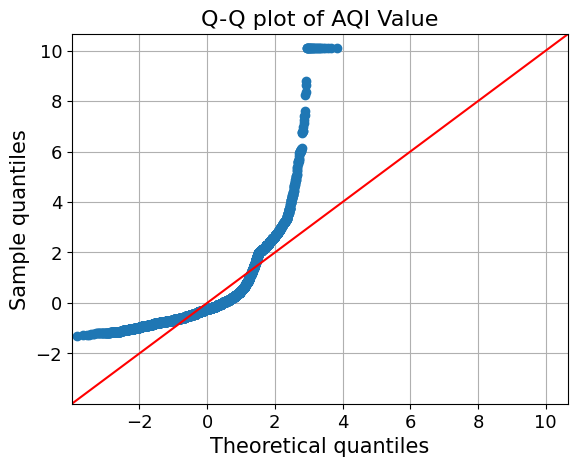

<Figure size 800x500 with 0 Axes>

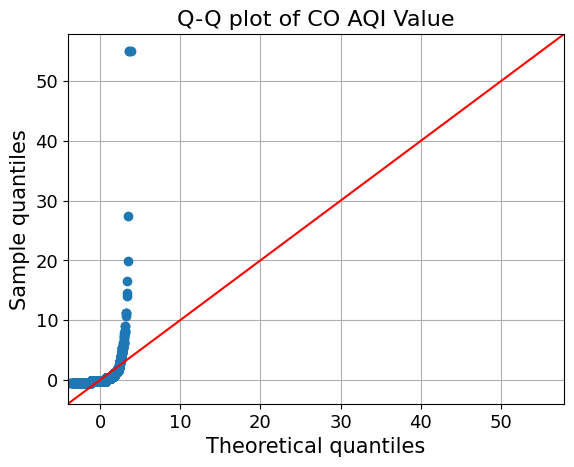

<Figure size 800x500 with 0 Axes>

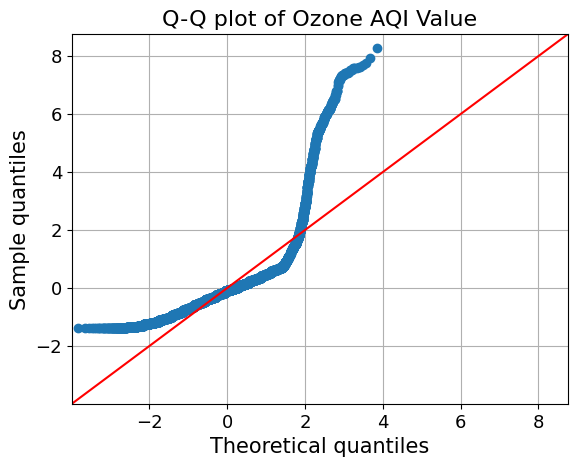

<Figure size 800x500 with 0 Axes>

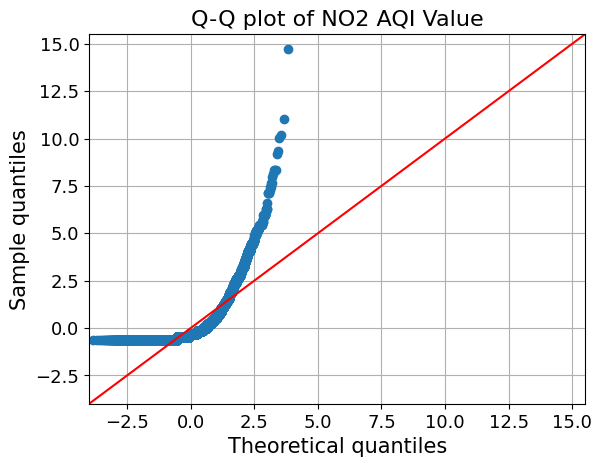

<Figure size 800x500 with 0 Axes>

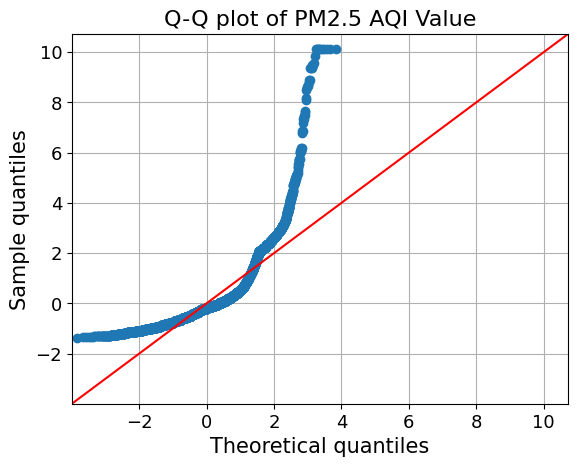

In [18]:
from statsmodels.graphics.gofplots import qqplot
data_norm = data[
    ["AQI Value", "CO AQI Value", "Ozone AQI Value", "NO2 AQI Value", "PM2.5 AQI Value"]
]
for c in data_norm.columns:
    plt.figure(figsize=(8, 5))
    fig = qqplot(data_norm[c], line="45", fit=True)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.xlabel("Theoretical quantiles", fontsize=15)
    plt.ylabel("Sample quantiles", fontsize=15)
    plt.title("Q-Q plot of {}".format(c), fontsize=16)
    plt.grid(True)
    plt.show()

<Axes: >

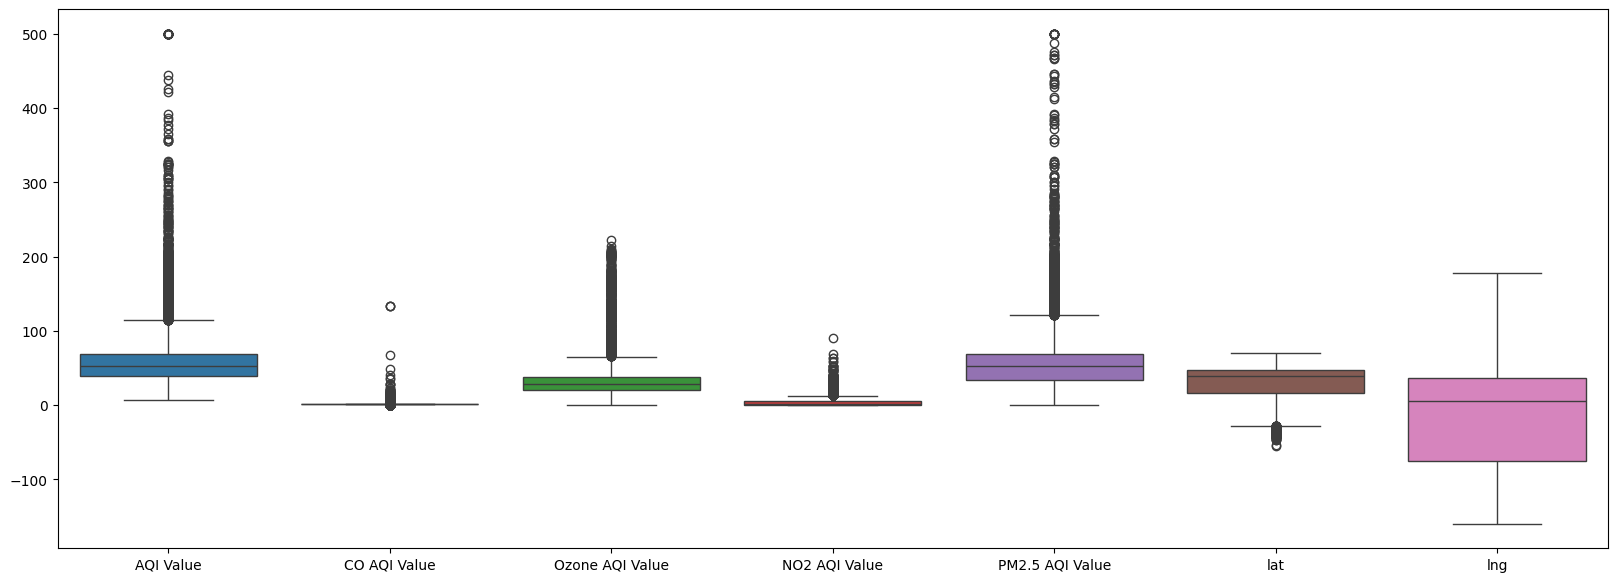

In [19]:
plt.figure(figsize=(20, 7))
sns.boxplot(data=data)

In [20]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()

from sklearn.preprocessing import MinMaxScaler

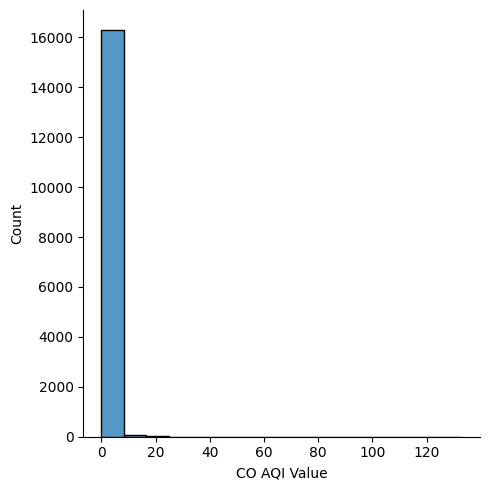

In [21]:
sns.displot(data['CO AQI Value'])

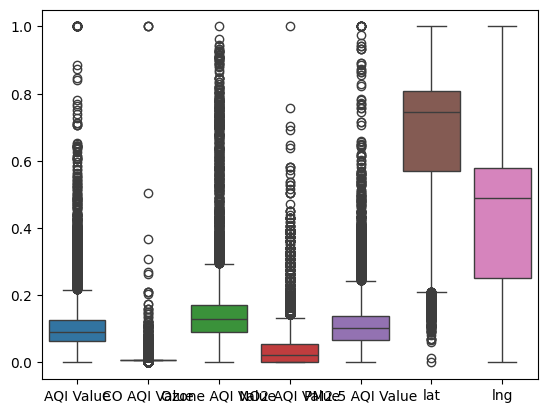

In [22]:
# Assuming 'data' is your DataFrame
numerical_columns = data.select_dtypes(include='number').columns

# Extract the numerical columns
data_numerical = data[numerical_columns]

# Apply Min-Max scaling
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_numerical)

# Create a box plot using seaborn
sns.boxplot(data=pd.DataFrame(data_scaled, columns=numerical_columns))

# Show the plot
plt.show()

What are the likely distributions of the numeric variables?

Answer- I have executed box plot, histogram, and q-q plot.

In [23]:
data[numerical_columns] = data_scaled


<ipython-input-23-3edaa2135c67>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[numerical_columns] = data_scaled


In [24]:
data.corr()

<ipython-input-24-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,lat,lng
AQI Value,1.000000,0.458529,0.328959,0.308275,0.980604,-0.101673,0.155514
CO AQI Value,0.458529,1.000000,0.039960,0.398974,0.458980,-0.077734,0.003489
Ozone AQI Value,0.328959,0.039960,1.000000,-0.252301,0.234705,0.247768,0.323898
NO2 AQI Value,0.308275,0.398974,-0.252301,1.000000,0.340821,0.038933,-0.290050
PM2.5 AQI Value,0.980604,0.458980,0.234705,0.340821,1.000000,-0.127804,0.118152
lat,-0.101673,-0.077734,0.247768,0.038933,-0.127804,1.000000,-0.021740
lng,0.155514,0.003489,0.323898,-0.290050,0.118152,-0.021740,1.000000


In [25]:
data = data.drop(['lat','lng'],axis=1)

In [28]:
data_copy = data.copy()  # Create a copy of the original DataFrame

# Drop the 'City' column
data_copy = data_copy.drop('City', axis=1)

# Remove duplicate rows based on the 'Country' column
data_copy = data_copy.drop_duplicates(subset='Country')

In [34]:
rows, columns = data_copy.shape

print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 174
Number of columns: 11


In [35]:
data_copy.head()

,Country,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,0.089249,Moderate,0.007519,Good,0.162162,Good,0.000000,Good,0.102,Moderate
1,Brazil,0.068966,Good,0.007519,Good,0.022523,Good,0.010989,Good,0.082,Good
3,Italy,0.119675,Moderate,0.007519,Good,0.175676,Good,0.021978,Good,0.132,Moderate
4,Poland,0.054767,Good,0.007519,Good,0.153153,Good,0.000000,Good,0.040,Good
5,United States of America,0.095335,Moderate,0.007519,Good,0.063063,Good,0.120879,Good,0.108,Moderate


In [36]:
data_copy = data.copy()
data_copy = pd.get_dummies(data_copy, columns=['Country'], drop_first=True)


In [41]:
data_copy = data.copy()  # Create a copy of the original DataFrame

# Perform one-hot encoding on the 'Country' column
data_copy = pd.get_dummies(data_copy, columns=['Country'], drop_first=True)

In [44]:
data_copy.head(20)

,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,...,Country_United Kingdom of Great Britain and Northern Ireland,Country_United Republic of Tanzania,Country_United States of America,Country_Uruguay,Country_Uzbekistan,Country_Venezuela (Bolivarian Republic of),Country_Viet Nam,Country_Yemen,Country_Zambia,Country_Zimbabwe
0,Praskoveya,0.089249,Moderate,0.007519,Good,0.162162,Good,0.000000,Good,0.102,...,0,0,0,0,0,0,0,0,0,0
1,Presidente Dutra,0.068966,Good,0.007519,Good,0.022523,Good,0.010989,Good,0.082,...,0,0,0,0,0,0,0,0,0,0
2,Presidente Dutra,0.068966,Good,0.007519,Good,0.022523,Good,0.010989,Good,0.082,...,0,0,0,0,0,0,0,0,0,0
3,Priolo Gargallo,0.119675,Moderate,0.007519,Good,0.175676,Good,0.021978,Good,0.132,...,0,0,0,0,0,0,0,0,0,0
4,Przasnysz,0.054767,Good,0.007519,Good,0.153153,Good,0.000000,Good,0.040,...,0,0,0,0,0,0,0,0,0,0
5,Punta Gorda,0.095335,Moderate,0.007519,Good,0.063063,Good,0.120879,Good,0.108,...,0,0,1,0,0,0,0,0,0,0
6,Punta Gorda,0.095335,Moderate,0.007519,Good,0.063063,Good,0.120879,Good,0.108,...,0,0,1,0,0,0,0,0,0,0
7,Puurs,0.115619,Moderate,0.007519,Good,0.130631,Good,0.076923,Good,0.128,...,0,0,0,0,0,0,0,0,0,0
8,Pyatigorsk,0.095335,Moderate,0.007519,Good,0.184685,Good,0.010989,Good,0.108,...,0,0,0,0,0,0,0,0,0,0
9,Qinzhou,0.123732,Moderate,0.015038,Good,0.306306,Moderate,0.010989,Good,0.116,...,0,0,0,0,0,0,0,0,0,0


In [45]:
del data_copy


In [47]:
data.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,0.089249,Moderate,0.007519,Good,0.162162,Good,0.000000,Good,0.102,Moderate
1,Brazil,Presidente Dutra,0.068966,Good,0.007519,Good,0.022523,Good,0.010989,Good,0.082,Good
2,Brazil,Presidente Dutra,0.068966,Good,0.007519,Good,0.022523,Good,0.010989,Good,0.082,Good
3,Italy,Priolo Gargallo,0.119675,Moderate,0.007519,Good,0.175676,Good,0.021978,Good,0.132,Moderate
4,Poland,Przasnysz,0.054767,Good,0.007519,Good,0.153153,Good,0.000000,Good,0.040,Good


In [48]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'data' is your DataFrame
data_copy = data.copy()  # Create a copy of the original DataFrame

# Label encoding for 'Country'
label_encoder_country = LabelEncoder()
data_copy['Country'] = label_encoder_country.fit_transform(data_copy['Country'])

# Label encoding for 'City'
label_encoder_city = LabelEncoder()
data_copy['City'] = label_encoder_city.fit_transform(data_copy['City'])

In [49]:
data_copy.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,130,9931,0.089249,Moderate,0.007519,Good,0.162162,Good,0.000000,Good,0.102,Moderate
1,22,9945,0.068966,Good,0.007519,Good,0.022523,Good,0.010989,Good,0.082,Good
2,22,9945,0.068966,Good,0.007519,Good,0.022523,Good,0.010989,Good,0.082,Good
3,75,9967,0.119675,Moderate,0.007519,Good,0.175676,Good,0.021978,Good,0.132,Moderate
4,123,9987,0.054767,Good,0.007519,Good,0.153153,Good,0.000000,Good,0.040,Good


In [120]:
correlation_matrix = data_no.corr()
target_correlation = correlation_matrix['AQI Value'].sort_values(ascending=False)
print(target_correlation)

AQI Value             1.000000
PM2.5 AQI Category    0.690557
AQI Category          0.689964
CO AQI Value          0.458529
Ozone AQI Category    0.404370
Ozone AQI Value       0.328959
NO2 AQI Value         0.308275
NO2 AQI Category      0.164559
CO AQI Category       0.138424
City                 -0.002855
Country              -0.077590
Name: AQI Value, dtype: float64


In [126]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

model = LinearRegression()
rfe = RFE(model, n_features_to_select=5)  # Choose the desired number of features
fit = rfe.fit(X_train, y_train)

# Display the ranking of features
feature_ranking = pd.DataFrame({'Feature': X_train.columns, 'Ranking': fit.ranking_})
feature_ranking = feature_ranking.sort_values(by='Ranking')
print(feature_ranking)


              Feature  Ranking
2           AQI Value        1
3        CO AQI Value        1
5     Ozone AQI Value        1
6  Ozone AQI Category        1
9  PM2.5 AQI Category        1
7       NO2 AQI Value        2
8    NO2 AQI Category        3
4     CO AQI Category        4
0             Country        5
1                City        6


<ipython-input-129-53b75c055129>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap="RdYlGn")


<Axes: >

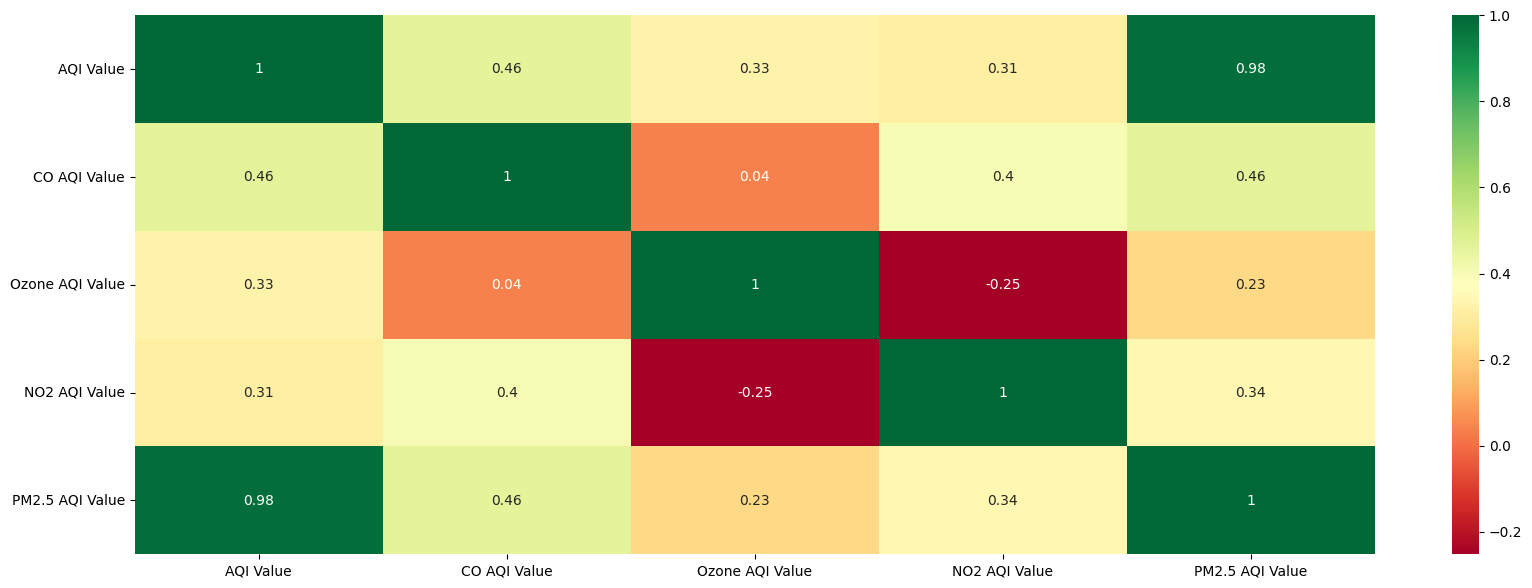

In [129]:
plt.figure(figsize=(20, 7))
sns.heatmap(data.corr(), annot=True, cmap="RdYlGn")

Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)

Answer- using heatmaps, RFE, correlation matrix i was able to determine useful independent variable to predict a target variable

In [51]:
cities_in_usa = data[data['Country'] == 'United States of America']['City'].unique()
num_cities_in_usa = len(cities_in_usa)

print(f"The USA has {num_cities_in_usa} unique cities in the dataset.")

The USA has 2777 unique cities in the dataset.


Which independent variables have missing data? How much?

Answer- yes Country had some missing data, I dropped the respective rows.

In [60]:
data_copy['AQI Category'].unique()
data_copy['CO AQI Category'].unique()
data_copy['Ozone AQI Category'].unique()
data_copy['PM2.5 AQI Category'].unique()
data_copy['NO2 AQI Category'].unique()

array(['Good', 'Moderate'], dtype=object)

In [61]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
data_copy['AQI Category'] = LE.fit_transform(data_copy['AQI Category'])
data_copy['CO AQI Category'] = LE.fit_transform(data_copy['CO AQI Category'])
data_copy['Ozone AQI Category'] = LE.fit_transform(data_copy['Ozone AQI Category'])
data_copy['PM2.5 AQI Category'] = LE.fit_transform(data_copy['PM2.5 AQI Category'])
data_copy['NO2 AQI Category'] = LE.fit_transform(data_copy['NO2 AQI Category'])

In [62]:
data_copy.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,130,9931,0.089249,2,0.007519,0,0.162162,0,0.000000,0,0.102,2
1,22,9945,0.068966,0,0.007519,0,0.022523,0,0.010989,0,0.082,0
2,22,9945,0.068966,0,0.007519,0,0.022523,0,0.010989,0,0.082,0
3,75,9967,0.119675,2,0.007519,0,0.175676,0,0.021978,0,0.132,2
4,123,9987,0.054767,0,0.007519,0,0.153153,0,0.000000,0,0.040,0


In [63]:
data_copy.dtypes

Country                 int64
City                    int64
AQI Value             float64
AQI Category            int64
CO AQI Value          float64
CO AQI Category         int64
Ozone AQI Value       float64
Ozone AQI Category      int64
NO2 AQI Value         float64
NO2 AQI Category        int64
PM2.5 AQI Value       float64
PM2.5 AQI Category      int64
dtype: object

In [64]:
# Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

model = sm.OLS(
    data_copy["AQI Category"],
    data_copy[
        [
            "Country",
            "City",
            "AQI Value",
            "CO AQI Value",
            "CO AQI Category",
            "Ozone AQI Value",
            "Ozone AQI Category",
            "NO2 AQI Value",
            "NO2 AQI Category",
            "PM2.5 AQI Value",
            "PM2.5 AQI Category",
        ]
    ],
).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           AQI Category   R-squared (uncentered):                   0.980
Model:                            OLS   Adj. R-squared (uncentered):              0.980
Method:                 Least Squares   F-statistic:                          7.361e+04
Date:                Tue, 30 Jan 2024   Prob (F-statistic):                        0.00
Time:                        01:19:17   Log-Likelihood:                         -700.14
No. Observations:               16393   AIC:                                      1422.
Df Residuals:                   16382   BIC:                                      1507.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Country                0.0007   3.62e-05     17.981      0.000       0.001       0.001
City                6.242e-06    4.4e-07     14.183      0.000    5.38e-06    7.11e-06
AQI Value              3.7870      0.133     28.568      0.000       3.527       4.047
CO AQI Value           1.1503      0.235      4.893      0.000       0.689       1.611
CO AQI Category       -0.4281      0.130     -3.290      0.001      -0.683      -0.173
Ozone AQI Value       -0.4225      0.032    -13.346      0.000      -0.485      -0.360
Ozone AQI Category     0.2918      0.008     38.687      0.000       0.277       0.307
NO2 AQI Value          0.0483      0.042      1.156      0.248      -0.034       0.130
NO2 AQI Category      -0.0597      0.092     -0.649      0.516      -0.240       0.121
PM2.5 AQI Value       -4.0360      0.133    -30.246      0.000      -4.298      -3.774
PM2.5 AQI Category     0.9806      0.002    412.856      0.000       0.976       0.985
==============================================================================
Omnibus:                     6018.727   Durbin-Watson:                   1.696
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3214731.889
Skew:                          -0.213   Prob(JB):                         0.00
Kurtosis:                      71.603   Cond. No.                     1.06e+06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.06e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [65]:
correlation_matrix = data_copy.drop("AQI Category", axis=1).corr()


In [68]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = data_copy.drop("AQI Category", axis=1)
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]


In [85]:
1/(1-0.979)

47.61904761904758

In [75]:
print(vif_data)

              Variable         VIF
0              Country    4.538423
1                 City    3.253986
2            AQI Value   93.536880
3         CO AQI Value    6.046721
4      CO AQI Category    3.449270
5      Ozone AQI Value    8.037021
6   Ozone AQI Category    3.042336
7        NO2 AQI Value    2.697215
8     NO2 AQI Category    1.458748
9      PM2.5 AQI Value  100.462802
10  PM2.5 AQI Category    4.548549


In [78]:
# Drop 'PM2.5 AQI Value' from the DataFrame
data_no = data_copy.drop('PM2.5 AQI Value', axis=1)


In [80]:
data_no.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Category
0,130,9931,0.089249,2,0.007519,0,0.162162,0,0.000000,0,2
1,22,9945,0.068966,0,0.007519,0,0.022523,0,0.010989,0,0
2,22,9945,0.068966,0,0.007519,0,0.022523,0,0.010989,0,0
3,75,9967,0.119675,2,0.007519,0,0.175676,0,0.021978,0,2
4,123,9987,0.054767,0,0.007519,0,0.153153,0,0.000000,0,0


In [81]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = data_no.drop("AQI Category", axis=1)
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)


             Variable       VIF
0             Country  4.424935
1                City  3.192691
2           AQI Value  7.238799
3        CO AQI Value  6.034024
4     CO AQI Category  3.446587
5     Ozone AQI Value  7.885391
6  Ozone AQI Category  2.966084
7       NO2 AQI Value  2.695896
8    NO2 AQI Category  1.458747
9  PM2.5 AQI Category  4.006863


In [84]:
# Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

model = sm.OLS(
    data_no["AQI Category"],
    data_no[
        [
            "Country",
            "City",
            "AQI Value",
            "CO AQI Value",
            "CO AQI Category",
            "Ozone AQI Value",
            "Ozone AQI Category",
            "NO2 AQI Value",
            "NO2 AQI Category",
            "PM2.5 AQI Category",
        ]
    ],
).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           AQI Category   R-squared (uncentered):                   0.979
Model:                            OLS   Adj. R-squared (uncentered):              0.979
Method:                 Least Squares   F-statistic:                          7.660e+04
Date:                Tue, 30 Jan 2024   Prob (F-statistic):                        0.00
Time:                        02:32:36   Log-Likelihood:                         -1145.5
No. Observations:               16393   AIC:                                      2311.
Df Residuals:                   16383   BIC:                                      2388.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Country                0.0005   3.67e-05     13.009      0.000       0.000       0.001
City                4.415e-06   4.48e-07      9.856      0.000    3.54e-06    5.29e-06
AQI Value             -0.0641      0.038     -1.693      0.090      -0.138       0.010
CO AQI Value           0.8245      0.241      3.416      0.001       0.351       1.297
CO AQI Category       -0.3183      0.134     -2.382      0.017      -0.580      -0.056
Ozone AQI Value       -0.2910      0.032     -9.031      0.000      -0.354      -0.228
Ozone AQI Category     0.3279      0.008     42.851      0.000       0.313       0.343
NO2 AQI Value          0.0762      0.043      1.776      0.076      -0.008       0.160
NO2 AQI Category      -0.0612      0.095     -0.647      0.517      -0.246       0.124
PM2.5 AQI Category     0.9558      0.002    417.279      0.000       0.951       0.960
==============================================================================
Omnibus:                     8834.033   Durbin-Watson:                   1.705
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1995199.404
Skew:                           1.454   Prob(JB):                         0.00
Kurtosis:                      56.968   Cond. No.                     1.06e+06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.06e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [89]:
from sklearn.model_selection import train_test_split

X = data_no[
    [
        "Country",
        "City",
        "AQI Value",
        "CO AQI Value",
        "CO AQI Category",
        "Ozone AQI Value",
        "Ozone AQI Category",
        "NO2 AQI Value",
        "NO2 AQI Category",
        "PM2.5 AQI Category",
    ]
]
y = data_no["AQI Category"]

X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(
    X_t, y_t, test_size=0.15, random_state=1
)


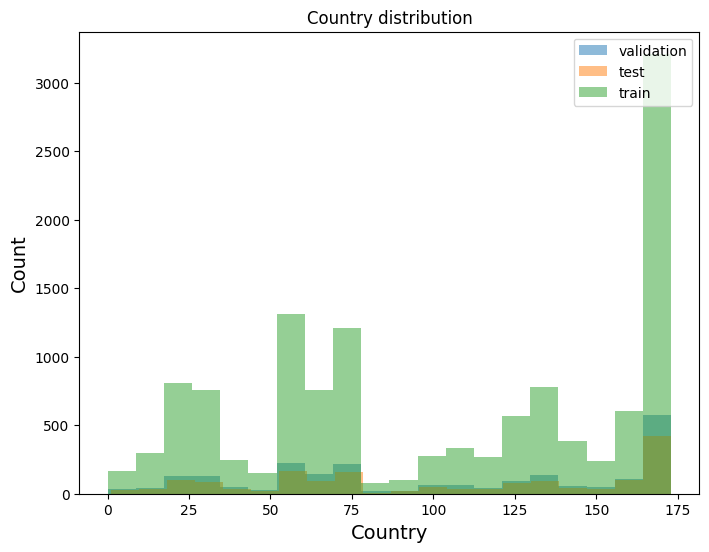

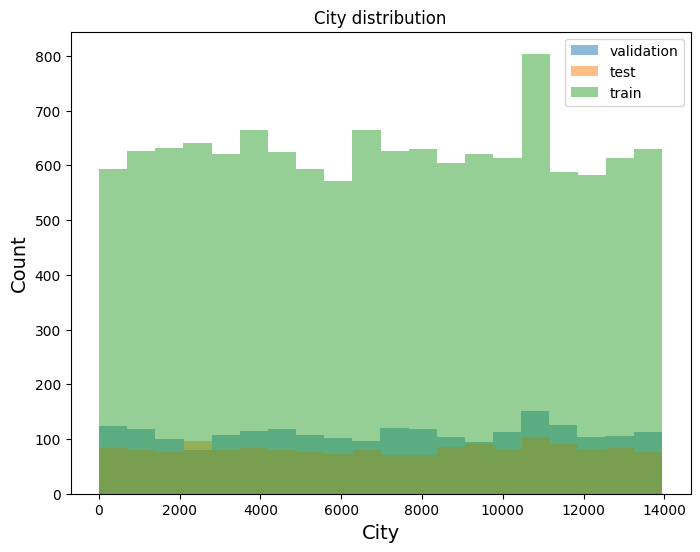

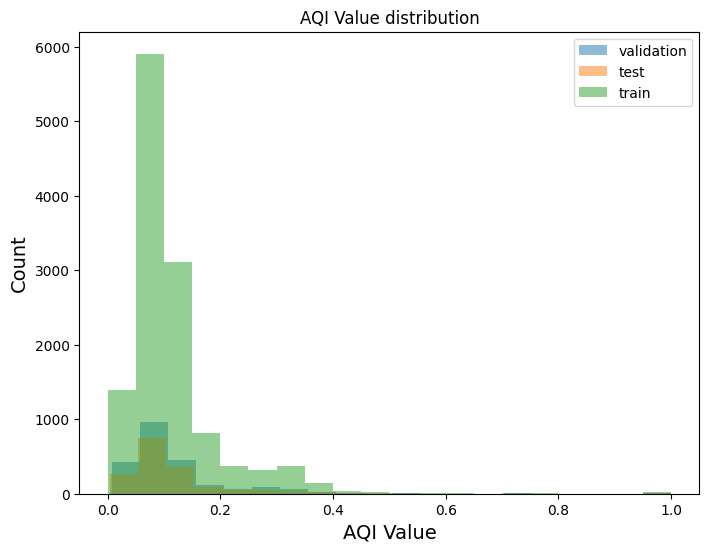

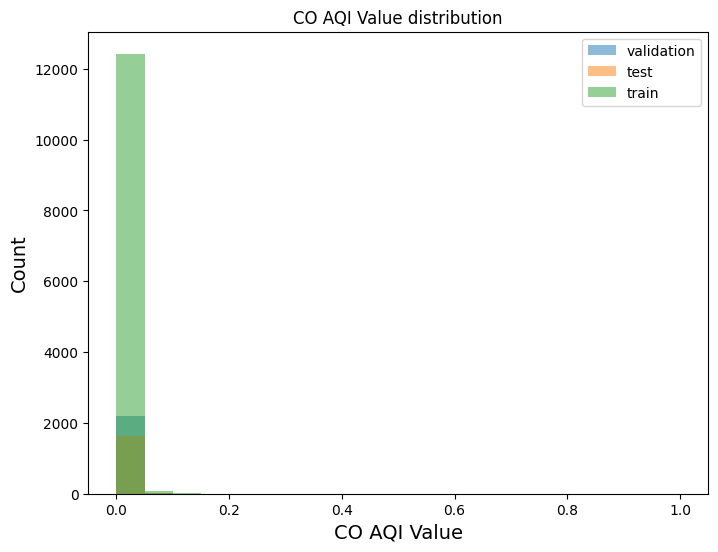

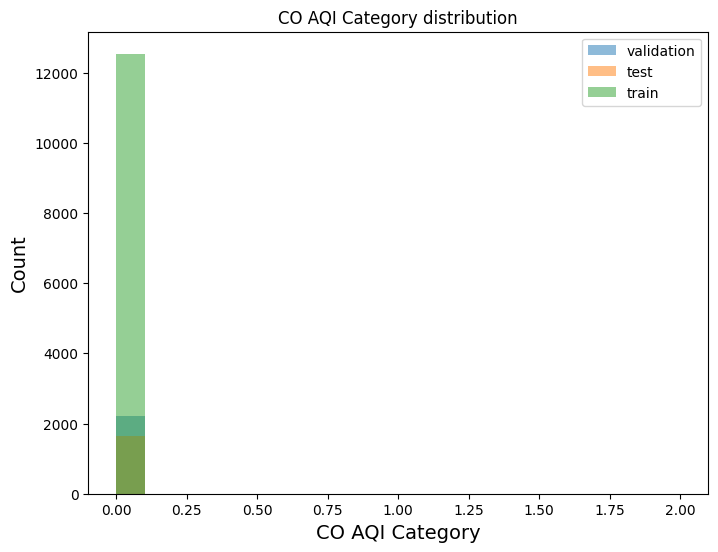

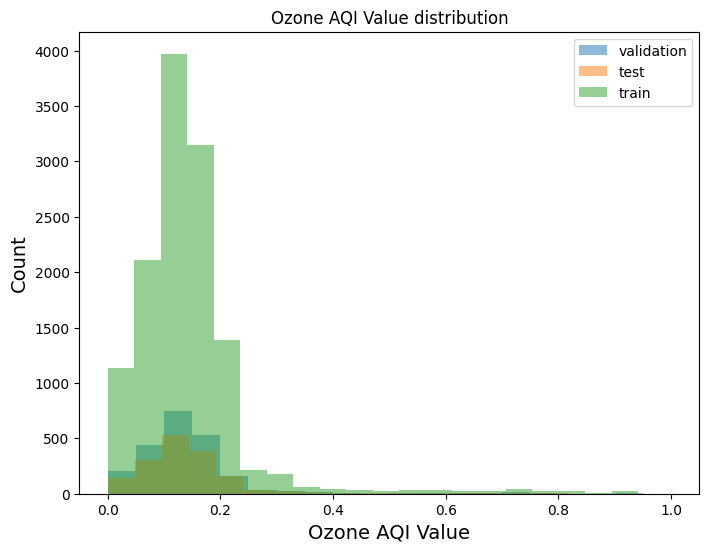

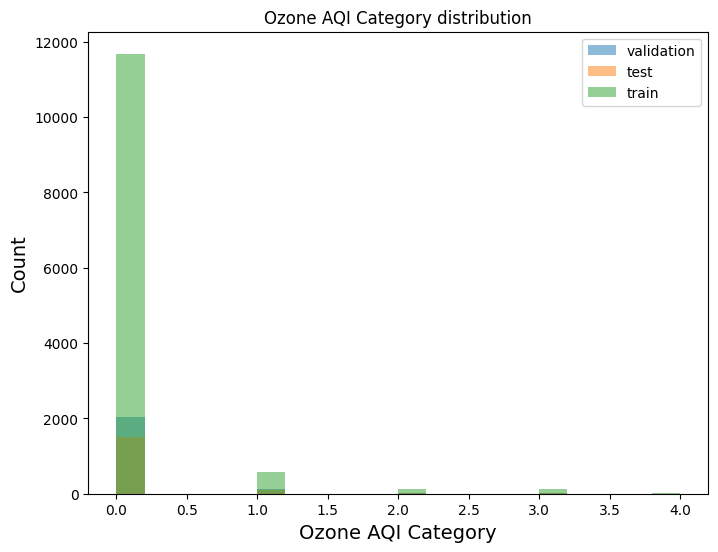

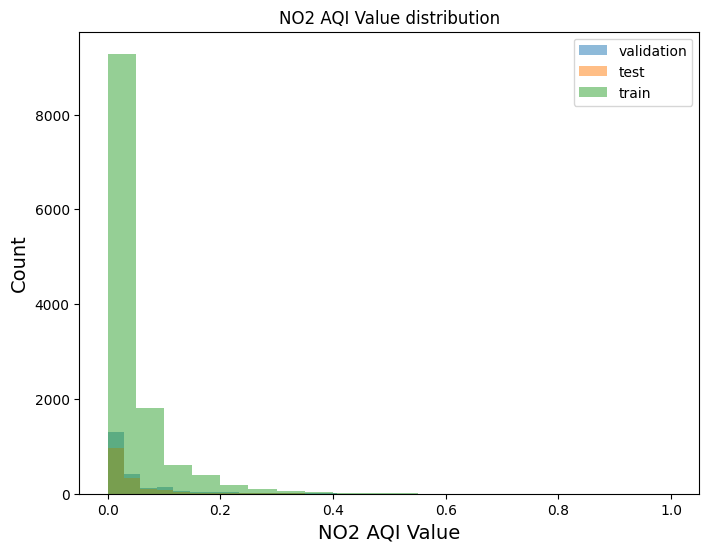

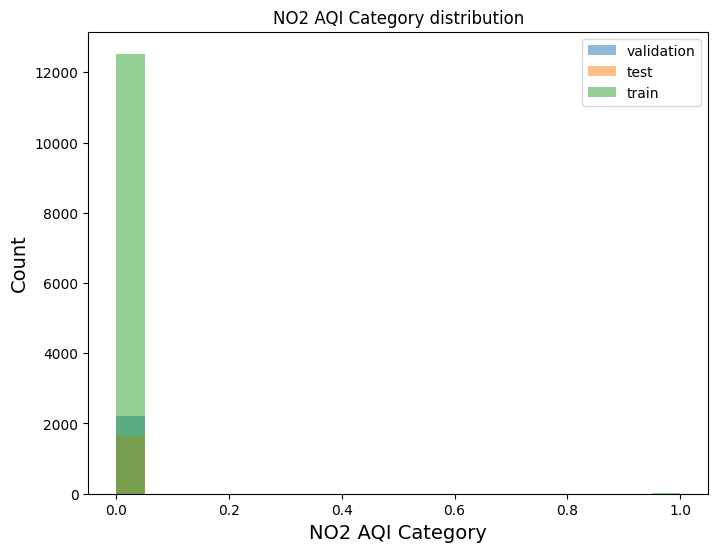

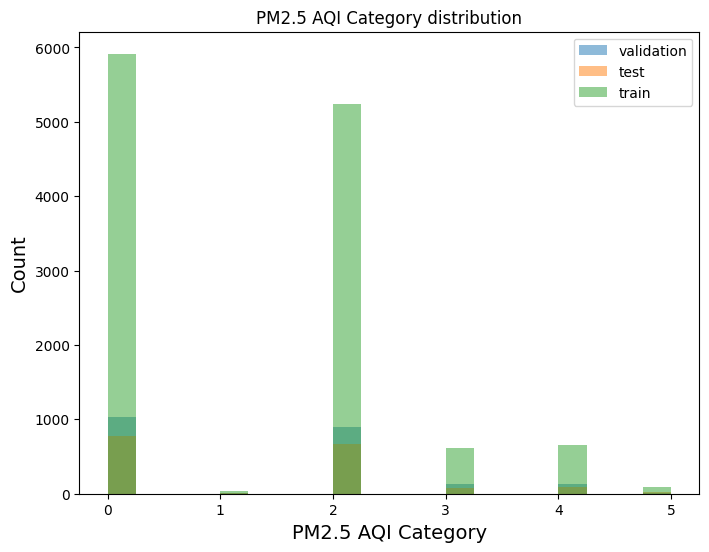

In [90]:
# Looking the data for test, training and validation set
X_test_plot = X_test[
    [
        "Country",
        "City",
        "AQI Value",
        "CO AQI Value",
        "CO AQI Category",
        "Ozone AQI Value",
        "Ozone AQI Category",
        "NO2 AQI Value",
        "NO2 AQI Category",
        "PM2.5 AQI Category",
    ]
]

X_val_plot = X_val[
    [
        "Country",
        "City",
        "AQI Value",
        "CO AQI Value",
        "CO AQI Category",
        "Ozone AQI Value",
        "Ozone AQI Category",
        "NO2 AQI Value",
        "NO2 AQI Category",
        "PM2.5 AQI Category",
    ]
]

X_train_plot = X_train[
    [
        "Country",
        "City",
        "AQI Value",
        "CO AQI Value",
        "CO AQI Category",
        "Ozone AQI Value",
        "Ozone AQI Category",
        "NO2 AQI Value",
        "NO2 AQI Category",
        "PM2.5 AQI Category",
    ]
]
# Plotting the data to see the histogram
for c in X_test_plot.columns[:]:
    plt.figure(figsize=(8, 6))
    plt.hist(X_val_plot[c], bins=20, alpha=0.5, label="validation")
    plt.hist(X_test_plot[c], bins=20, alpha=0.5, label="test")
    plt.hist(X_train_plot[c], bins=20, alpha=0.5, label="train")
    plt.xlabel(c, size=14)
    plt.ylabel("Count", size=14)
    plt.legend(loc="upper right")
    plt.title("{} distribution".format(c))
    plt.show()

In [91]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model

In [92]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

LinearRegression()

In [93]:
# Make predictions using the training set
y_pred = regr.predict(X_train)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_train, y_pred))
r2 = r2_score(y_train, y_pred)
print("R^2 score on tarining set =", r2)

Mean squared error: 0.06
Coefficient of determination: 0.96
R^2 score on tarining set = 0.9598240308563124


In [94]:
# Make predictions using the testing set
y_pred = regr.predict(X_test)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("R^2 score on test set =", r2)

Mean squared error: 0.08
Coefficient of determination: 0.95
R^2 score on test set = 0.9537280416245737


In [95]:
# Make predictions using the validation set
y_pred = regr.predict(X_val)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_val, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_val, y_pred))
r2_val = r2_score(y_val, y_pred)
print("R^2 score on validation set =", r2_val)

Mean squared error: 0.07
Coefficient of determination: 0.96
R^2 score on validation set = 0.9584686417648891


Do the training and test sets have the same data?

Answer- yes they have the same value

Is the predictor variables independent of all the other predictor variables?

Answer- NO

Which predictor variables are the most important?

Answer- If the P value is less than 0.5, then the predictor variable are important to predict target variable

Do the ranges of the predictor variables make sense?

Answer- yes, as the following dataset contain ranges of AQI levels, it is easier to understand and implement the above graphs.

What are the distributions of the predictor variables?   

Answer- In the above graphs ( histogram, displot, boxplot), we can can see the distribution. Some of the variables have outlier. basically they are skewed to right side (1.454).   

In [97]:
pip install eli5


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107717 sha256=01a7bb0b2fda334ff04fd2728b23181a2ad81e80a738be1192b3426f211b5791
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [98]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(regr, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names=X_test.columns.tolist())

Weight,Feature
1.7996 ± 0.0760,PM2.5 AQI Category
0.0382 ± 0.0015,Ozone AQI Category
0.0056 ± 0.0006,Ozone AQI Value
0.0006 ± 0.0004,AQI Value
0.0002 ± 0.0001,Country
0.0001 ± 0.0000,CO AQI Category
0.0000 ± 0.0001,CO AQI Value
0.0000 ± 0.0000,NO2 AQI Category
-0.0000 ± 0.0000,NO2 AQI Value
-0.0001 ± 0.0001,City


In [100]:
data_no.head(10)

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Category
0,130,9931,0.089249,2,0.007519,0,0.162162,0,0.000000,0,2
1,22,9945,0.068966,0,0.007519,0,0.022523,0,0.010989,0,0
2,22,9945,0.068966,0,0.007519,0,0.022523,0,0.010989,0,0
3,75,9967,0.119675,2,0.007519,0,0.175676,0,0.021978,0,2
4,123,9987,0.054767,0,0.007519,0,0.153153,0,0.000000,0,0
5,166,10039,0.095335,2,0.007519,0,0.063063,0,0.120879,0,2
6,166,10039,0.095335,2,0.007519,0,0.063063,0,0.120879,0,2
7,15,10059,0.115619,2,0.007519,0,0.130631,0,0.076923,0,2
8,130,10064,0.095335,2,0.007519,0,0.184685,0,0.010989,0,2
9,33,10081,0.123732,2,0.015038,0,0.306306,1,0.010989,0,2


In [101]:
Q1 = np.percentile(data_no['AQI Value'], 25)
Q3 = np.percentile(data_no['AQI Value'], 75)
IQR = Q3 - Q1
outliers = (data_no['AQI Value'] < Q1 - 1.5 * IQR) | (data_no['AQI Value'] > Q3 + 1.5 * IQR)

In [103]:
outlier_indices = np.where(outliers)[0]

# Display the indices of rows containing outliers
print("Indices of Outliers:", outlier_indices)

# Display the actual data points of outliers
print("Outlier Values:", data['AQI Value'].iloc[outlier_indices])

Indices of Outliers: [   15    32    37 ... 16323 16336 16387]
Outlier Values: 15       0.298174
32       0.486815
37       0.237323
60       0.397566
74       0.300203
           ...   
16558    0.352941
16564    0.265720
16625    0.229209
16638    0.496957
16689    0.310345
Name: AQI Value, Length: 1561, dtype: float64


In [104]:
df_imputation= data_no[['AQI Value']]
df_imputation['1_percent'] = df_imputation[['AQI Value']]
df_imputation['5_percent'] = df_imputation[['AQI Value']]
df_imputation['10_percent'] = df_imputation[['AQI Value']]
# df_imputation['sample_num'] = df_imputation[['Unnamed: 0']]
# df_imputation['sample_num'] = df_imputation['sample_num']/1000
df_imputation.head()

<ipython-input-104-a527b5e02fbc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_imputation['1_percent'] = df_imputation[['AQI Value']]
<ipython-input-104-a527b5e02fbc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_imputation['5_percent'] = df_imputation[['AQI Value']]
<ipython-input-104-a527b5e02fbc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

,AQI Value,1_percent,5_percent,10_percent
0,0.089249,0.089249,0.089249,0.089249
1,0.068966,0.068966,0.068966,0.068966
2,0.068966,0.068966,0.068966,0.068966
3,0.119675,0.119675,0.119675,0.119675
4,0.054767,0.054767,0.054767,0.054767


In [105]:
#Creating a seperate dataframe for performing the KNN imputation
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
df_imputation1 = df_imputation[['1_percent','5_percent','10_percent']]
imputer = KNNImputer(n_neighbors=5)
imputed_number_df = pd.DataFrame(imputer.fit_transform(df_imputation1), columns = df_imputation1.columns)

In [106]:
# imputed_number_df.sample(10)
imputed_number_df.head()

,1_percent,5_percent,10_percent
0,0.089249,0.089249,0.089249
1,0.068966,0.068966,0.068966
2,0.068966,0.068966,0.068966
3,0.119675,0.119675,0.119675
4,0.054767,0.054767,0.054767


In [107]:
df_imputation_mean = df_imputation[['1_percent','5_percent','10_percent']]

In [108]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer( strategy='mean') #for median imputation replace 'mean' with 'median'
imp_mean.fit(df_imputation_mean)
imputed_train_df = imp_mean.transform(df_imputation_mean)

In [110]:
def get_percent_missing(data_no):
    total_missing = data_no.isnull().sum().sort_values(ascending=False)
    percent_missing = (total_missing / len(df)) * 100
    missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total Missing', 'Percent Missing'])
    return missing_data

In [116]:
df = data_no # Define the df variable here

def get_percent_missing(data_no):
    total_missing = data_no.isnull().sum().sort_values(ascending=False)
    percent_missing = (total_missing / len(df)) * 100
    missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total Missing', 'Percent Missing'])
    return missing_data

imputed_mean = pd.DataFrame(imp_mean.fit_transform(df_imputation_mean), columns = df_imputation_mean.columns)
print(get_percent_missing(imputed_mean))

            Total Missing  Percent Missing
1_percent               0              0.0
5_percent               0              0.0
10_percent              0              0.0


Remove outliers and keep outliers (does if have an effect of the final predictive model)?

Answer- NO, as seen above.

Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.

Answer- As seen above, using KNN, mean imputation and data imputation, it can be stated that no missing value were found and data was handled perfectly

**Citation**

https://www.youtube.com/watch?v=He74ncsUMbE

https://www.youtube.com/watch?v=I3FBJdiExcg

https://www.youtube.com/watch?v=IhSWvwmpwTU

https://www.youtube.com/watch?v=osKhv_ke9bQ




MIT License

Copyright (c) [2024] [Pranav Deepak Kharat]

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS," WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.